In [1]:
import numpy as np
import pandas as pd
import sympy as sp

from utilities import *

In [2]:
SLOPE_ANGLE = 3 * sp.pi / 360
DETECTOR_ANGLE = 2 * sp.pi / 3
CENTER_WATER_DEPTH = 110

PRECISION = 20

NM_TO_M = 1852
LENGTH = 4 * NM_TO_M
WIDTH = 2 * NM_TO_M

In [3]:
field = Field(length=LENGTH, width=WIDTH, center_depth=CENTER_WATER_DEPTH, slope_angle=SLOPE_ANGLE, precision=PRECISION)

In [5]:
def loss(first_left_measuring_line_from_top, direction_angle):
    # print(f"s = {first_left_measuring_line_from_top}")
    # print(f"beta = {direction_angle}")
    field.arrange_measuring_lines(
        first_left_measuring_line_from_top = first_left_measuring_line_from_top,
        direction_angle = direction_angle,
        detector_angle = DETECTOR_ANGLE
    )
    len = field.get_measuring_line_gross_length()
    # print(f"len = {len}")
    # print("------------------")
    return len


In [6]:
import random
# 简陋的自动微分
def get_autograd(f):
    def grad(x, y):
        # 随机从(0.000001, 0.000001)中取一个数
        dd = random.uniform(0.000001, 0.000001)
        dx = random.choice([-1, 1]) * dd
        dy = random.choice([-1, 1]) * dd
        fxy = f(x, y)
        return (f(x+dx, y) - fxy) / dx, (f(x, y+dy) - fxy) / dy
    return grad

In [7]:
loss_grad = get_autograd(loss)

In [9]:
def SGD(f_grad, x0, params=None):
    if params is None:
        params = {}
    params.setdefault('n_epoch', 25)  # 迭代次数
    params.setdefault('lr', np.array([0.0005, 8e-8]))  # 学习率

    x_trace = []
    x_trace.append(x0) # 起始点
    v = np.zeros_like(x0)
    # 利用梯度值对坐标进行更新
    for iter in range(1, params['n_epoch'] + 1):
        print(f"Epoch {iter}: ")

        print(f"当前参数 (s, beta(deg)) = ({x_trace[-1][0]}, {(180*x_trace[-1][1]/sp.pi).evalf(PRECISION)})")
        
        grad = np.array(f_grad(x_trace[-1][0], x_trace[-1][1]))
        print(f"第{iter}次迭代，梯度为{grad}")
        
        v = -params['lr']*grad
        print(f"第{iter}次迭代，更新量为(ds = {v[0]}, dbeta = {(180*v[1]/sp.pi).evalf(PRECISION)} deg)")
        x_trace.append(x_trace[-1] + v)

        print("------------------")


    print(f"SGD求得极值点 (x_1, x_2) = ({x_trace[-1][0]}, {x_trace[-1][1]})")
    return x_trace

SGD(loss_grad, np.array([20, (80 * sp.pi / 180).evalf(PRECISION)]))

print("Done!")

Epoch 1: 
当前参数 (s, beta(deg)) = (20, 80.000000000000000000)
第1次迭代，梯度为[-4.9851280667922994763 -152201.88530333401267]
第1次迭代，更新量为(ds = 0.0024925640333961497900, dbeta = 0.69764205294522162311 deg)
------------------
Epoch 2: 
当前参数 (s, beta(deg)) = (20.002492564033396150, 80.697642052945221623)
第2次迭代，梯度为[-10.484789965570229717 -147621.05423616112667]
第2次迭代，更新量为(ds = 0.0052423949827851149674, dbeta = 0.67664507000030840134 deg)
------------------
Epoch 3: 
当前参数 (s, beta(deg)) = (20.007734959016181265, 81.374287122945530024)
第3次迭代，梯度为[-16.895588103249537735 -141854.61025870083705]
第3次迭代，更新量为(ds = 0.0084477940516247690436, dbeta = 0.65021363778373990521 deg)
------------------
Epoch 4: 
当前参数 (s, beta(deg)) = (20.016182753067806034, 82.024500760729269930)
第4次迭代，梯度为[-24.381341251933364982 -134388.96393441446872]
第4次迭代，更新量为(ds = 0.012190670625966682745, dbeta = 0.61599363572622268569 deg)
------------------
Epoch 5: 
当前参数 (s, beta(deg)) = (20.028373423693772717, 82.640494396455492615)
第5次迭代，梯度为

Matrix([[-3682], [-1852], [110]])
(Point3D(-3704.5064160067424188, -1851.9960718893387000, 97.005914462102322425), Point3D(-3657.3550159327591944, -1852.0043013612044270, 95.771211597887642955))

Matrix([[-3681.3535300384919282], [1852.0000000000000000], [110]])
(Point3D(-3703.8879947550241514, 1852.0039330060847173, 96.989720531708109467), Point3D(-3656.6778320625741788, 1851.9956932782071929, 95.753478914175059674))
------------------
Matrix([[-3637.37493523614], [-1852], [110]])
(Point3D(-3661.8175208492686641, -1851.9957339639901840, 95.888066401633470992), Point3D(-3610.6098060028940881, -1852.0046713963458551, 94.547145196929017261))

Matrix([[-3636.7284652746319282], [1852.0000000000000000], [110]])
(Point3D(-3661.1990995975490404, 1852.0042709314332334, 95.871872471239222518), Point3D(-3609.9326221327074463, 1851.9953232430657648, 94.529412513216391394))
------------------
Matrix([[-3588.91088988769], [-1852], [110]])
(Point3D(-3615.4562088436713466, -1851.9953669677852141, 94.

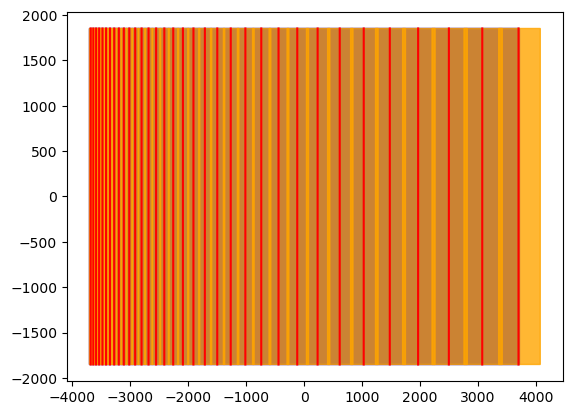

In [12]:
field.arrange_measuring_lines(
    first_left_measuring_line_from_top = 22, 
    direction_angle = 89.99 * sp.pi / 180, 
    detector_angle = DETECTOR_ANGLE
)

for line in field.measuring_lines['left']:
	print(line.detector_0.loc)
	print(line.detector_0.get_detect_point())
	print("")
	print(line.get_end_detector().loc)
	print(line.get_end_detector().get_detect_point())
	print("------------------")

import matplotlib.pyplot as plt

plt.figure()

# plot whole field as a rectangle
plt.fill([- LENGTH / 2, LENGTH / 2, LENGTH / 2, - LENGTH / 2, - LENGTH / 2],
		 [- WIDTH / 2, - WIDTH / 2, WIDTH / 2, WIDTH / 2, - WIDTH / 2],
		 color='blue')

for line in field.measuring_lines['left']:
	plt.plot([line.detector_0.loc[0], line.get_end_detector().loc[0]], [line.detector_0.loc[1], line.get_end_detector().loc[1]], color='red')
	plt.fill([line.detector_0.get_detect_point()[0][0],
		      line.get_end_detector().get_detect_point()[0][0],
			  line.get_end_detector().get_detect_point()[1][0],
			  line.detector_0.get_detect_point()[1][0],
			  line.detector_0.get_detect_point()[0][0]],
			 [line.detector_0.get_detect_point()[0][1],
	 		  line.get_end_detector().get_detect_point()[0][1],
			  line.get_end_detector().get_detect_point()[1][1],
			  line.detector_0.get_detect_point()[1][1],
			  line.detector_0.get_detect_point()[0][1]],
			  color='orange', alpha=0.8)

plt.show()

In [13]:
field.get_measuring_line_gross_length()

125936.00191811499329